### 목차

1) Object Detection이란?<br>
2) Region Proposal<br>
3) Basic concept<br>

- IoU(Intersection over Union)<br>
- NMS(Non-max suppression)<br>
- mAP(mean Average Precision)<br>

### 1) Object Detection

#### Computer Vision

Object Detection은 컴퓨터 비전의 한 분야이다. 먼저 컴퓨터 비전에 대하여 정의를 살펴보자.

***컴퓨터 비전(Computer Vision)은 기계의 시각에 해당하는 부분을 연구하는 컴퓨터 과학의 최신 연구 분야 중 하나이다. 공학적인 관점에서, 컴퓨터 비전은 인간의 시각이 할 수 있는 몇 가지 일을 수행하는 자율적인 시스템을 만드는 것을 목표로 한다 (많은 경우에는 인간의 시각을 능가하기도 한다).그리고 과학적 관점에서는 컴퓨터 비전은 이미지에서 정보를 추출하는 인공 시스템 관련 이론에 관여한다.***

쉽게 컴퓨터 비전은 컴퓨터가 사물을 인지하고, 의미하고 있는 정보를 알고리즘을 이용해 추출하는 학문이라고 할 수 있다. 컴퓨터 비전은 여러 분야로 나뉠 수 있는데, 우리는 그 중 Object Detection분야에 대하여 공부해보자.

#### Object Detection

***객체 탐지는 컴퓨터 비전과 이미지 처리와 관련된 컴퓨터 기술로서, 디지털 이미지와 비디오로 특정한 계열의 시맨틱 객체 인스턴스를 감지하는 일을 다룬다. 잘 연구된 객체 탐지 분야로는 얼굴 검출, 보행자 검출이 포함된다.***

Object Detection, 객체 탐지는 이미지 및 비디오 내에서 유의미한 특정 객체를 감지하는 작업을 한다. 이를 활용하여 얼굴 인식, 비디오 추적, 사람 수 세기, 자율 주행 등 다양한 문제를 해결하기 위해 사용하고 있다.

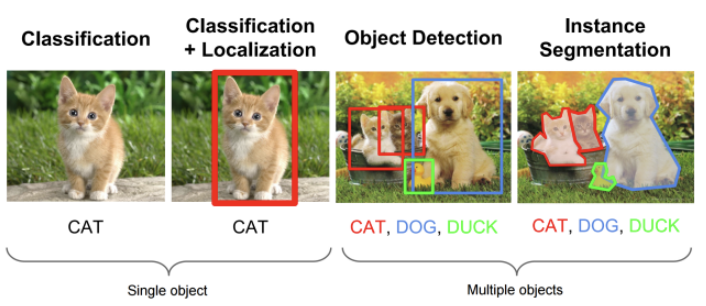
<center> 출처 :https://dacon.io/forum/405806 </center>

Object Detecion은 이미지에서 어떤 물체가 있는지 분류(Classification)하고 분류된 Object가 이미지의 어디에 있는지 bounding box를 통해 위치(Localization)를 파악하는 과정을 거치면서 Object를 탐지할 수 있다.

Object Detection은 이미지에서 Object의 개수에 따라서 크게 두 가지로 나뉜다.
- Single Object Detection
- Multi Object Detection

Object Detection은 2012년 AlexNet 모형이 나온 후 딥러닝 연구가 활발해졌고 그와 동시에 함께 연구가 활발해져 많이 진행되어져 왔다. 
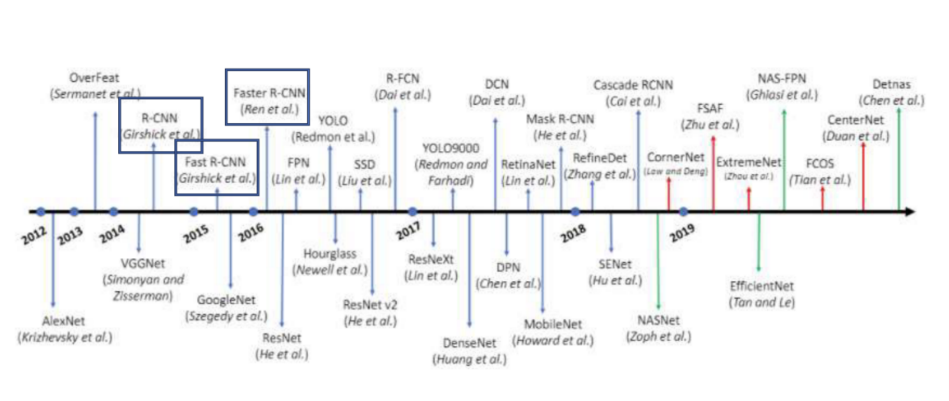
<center> 출처 :https://dacon.io/forum/405806 </center>

사진처럼 여러 모형들이 나옴을 확인할 수 있는데, 위 모형은 수행 방식에 따라 두 가지로 분류가 가능하다.
- One-stage Detector 
    - 속도가 빠르지만 정확도가 좋지 않음.
    - YOLO, SSD 모형 등
- Two-stage Detector
    - 속도는 느리지만 정확도가 좋음
    - R-CNN 계열 모형 등

### 2) Region Proposal

곧 공부할 R-CNN 계열의 모형에서는 대부분 Region Proposal 단계를 거치게 된다.
Region Proposal, 영억 제안은 pixel이 서로 유사한 영역의 섬을 구분하는데 도움이 되는 기술이다. Region Proposal을 생성하는 것은 이미지 안에서 존재하는 물체의 위치를 식별해야 할 때 편리하다. 그러므로 Region Proposal은 지역에 대한 제안을 생성하며, 이미지의 객체 주위에 정확히 맞는 Bounding Box를 식별하는 작업인 Object Localization을 돕는다. 이 때 사용하는 알고리즘이 **Selective Search 알고리즘**이다.
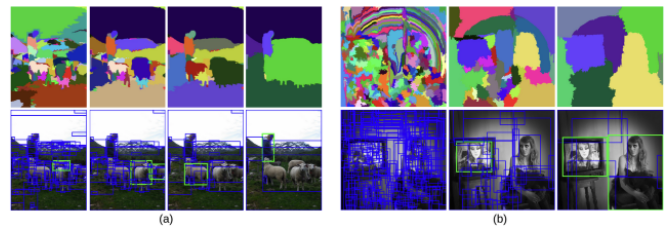
<center> 출처 : https://nuggy875.tistory.com/21 </center>

Selective Search 알고리즘은 Segmentation 분야에서 많이 쓰이는 알고리즘이며, Object와 주변과의 색감, 질감의 차이 등을 파악하여 다양한 전략으로 물체의 위치를 파악할 수 있도록 하는 알고리즘이다. 그림처럼 많고 작은 bounding box를 생성하고 이들을 조금씩 merge(커지게 만들면서) 하면서 Object를 인식한다.

In [9]:
!pip install opencv-contrib-python --upgrade

Requirement already up-to-date: opencv-contrib-python in /home/user303/.local/lib/python3.8/site-packages (4.5.5.64)


(225, 225, 3)


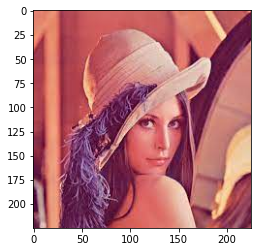

In [1]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('lenna.jpg')
print(img.shape)
plt.imshow(img[:,:,::-1])

(225, 225, 3)


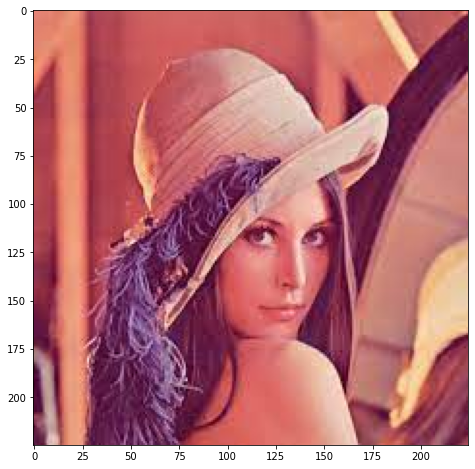

In [2]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.figure(figsize=(8,8))
plt.imshow(img_rgb)

In [3]:
_, regions = selectivesearch.selective_search(img_rgb)
print(type(regions))
print(len(regions))
regions

<class 'list'>
447


[{'rect': (0, 0, 15, 39), 'size': 405, 'labels': [0.0]},
 {'rect': (3, 0, 19, 87), 'size': 259, 'labels': [1.0]},
 {'rect': (23, 0, 0, 55), 'size': 56, 'labels': [2.0]},
 {'rect': (24, 0, 0, 55), 'size': 56, 'labels': [3.0]},
 {'rect': (25, 0, 0, 156), 'size': 157, 'labels': [4.0]},
 {'rect': (26, 0, 0, 55), 'size': 56, 'labels': [5.0]},
 {'rect': (27, 0, 0, 55), 'size': 56, 'labels': [6.0]},
 {'rect': (28, 0, 0, 55), 'size': 56, 'labels': [7.0]},
 {'rect': (29, 0, 5, 87), 'size': 211, 'labels': [8.0]},
 {'rect': (31, 0, 13, 63), 'size': 375, 'labels': [9.0]},
 {'rect': (32, 0, 12, 15), 'size': 174, 'labels': [10.0]},
 {'rect': (35, 0, 12, 55), 'size': 280, 'labels': [11.0]},
 {'rect': (48, 0, 9, 27), 'size': 238, 'labels': [12.0]},
 {'rect': (56, 0, 13, 7), 'size': 100, 'labels': [13.0]},
 {'rect': (64, 0, 31, 7), 'size': 217, 'labels': [14.0]},
 {'rect': (96, 0, 19, 5), 'size': 117, 'labels': [15.0]},
 {'rect': (115, 0, 15, 14), 'size': 118, 'labels': [16.0]},
 {'rect': (96, 0, 41, 3

In [15]:
#rect만 따로 뽑기
rect = []
for i in range(len(regions)):
    rect.append(regions[i]['rect'])

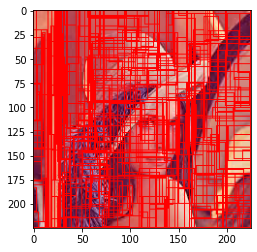

In [16]:
blue = (255,0,0)
img_rgb_copy = img_rgb.copy()


for i in range(len(rect)):
    left = rect[i][0]
    top = rect[i][1]
    right = left + rect[i][2]
    bottom = top + rect[i][3]
    # 0은 thickness이다.
    img_rgb_copy = cv2.rectangle(img_rgb_copy,(left,top),(right,bottom),blue,0)
plt.imshow(img_rgb_copy)

In [17]:
# bounding box 크기가 큰 후보만 추출
size_over_10000 = [i['rect'] for i in regions if i['size']>10000] 
size_over_10000

[(87, 0, 112, 224),
 (87, 0, 112, 224),
 (73, 0, 126, 224),
 (73, 0, 126, 224),
 (73, 0, 126, 224),
 (137, 3, 87, 221),
 (137, 0, 87, 224),
 (19, 0, 118, 224),
 (137, 0, 87, 224),
 (73, 0, 151, 224),
 (19, 0, 205, 224),
 (19, 0, 205, 224),
 (19, 0, 205, 224),
 (19, 0, 205, 224),
 (19, 0, 205, 224),
 (19, 0, 205, 224)]

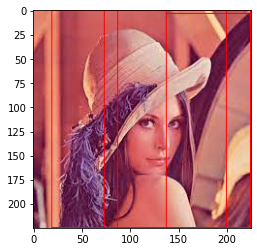

In [18]:
img_rgb_copy2 = img_rgb.copy()


for i in range(len(size_over_10000)):
    left = size_over_10000[i][0]
    top = size_over_10000[i][1]
    right = left + size_over_10000[i][2]
    bottom = top + size_over_10000[i][3]

    img_rgb_copy2 = cv2.rectangle(img_rgb_copy2,(left,top),(right,bottom),blue,0)
plt.imshow(img_rgb_copy2)

### 3) Basic Concept

#### 3-1) IoU(Intersection over Union)

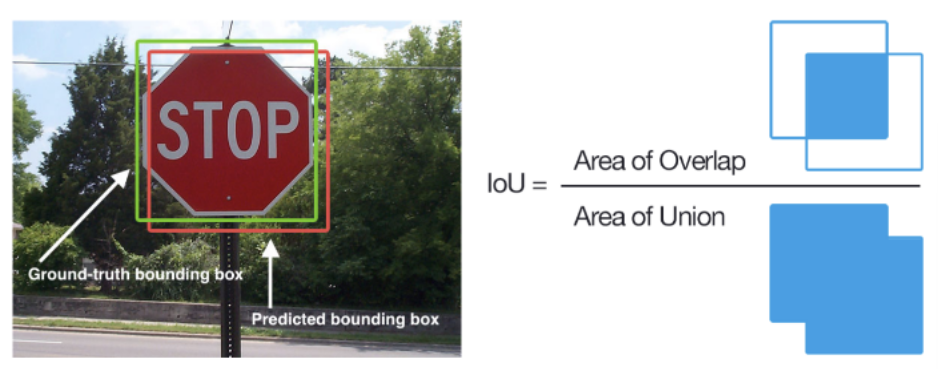
<center> 출처 : https://oniss.tistory.com/36 </center> 

IoU(Intersection over Union) 는 교집합/합집합을 나타낸다. 
- **Intersection** : 교집합, predicted bounding box와 ground truth bounding box가 overlap, 겹치는 부분
- **Union** : 합집합, predicted bounding boxd와 ground truth bounding box를 모두 둘러싼 부분
- **Intersection over Union(IoU)** : Intersection을 Union으로 나눈 비율

즉, IoU 값은 모형이 **얼마나** Object를 **잘** Detection 하였는지 정확도를 측정할 수 있는 지표라고 할 수 있다. 일반적으로 분류의 경우 맞다, 아니다 또는 종류를 이용하여 명확하게 측정할 판단 척도가 있지만 bounding box의 경우 ground truth bounding box와 predicted bounding box가 정확하게 일치하기 힘들기 때문에 정확도로 간단히 이야기하기 힘들다. 이때, 사용되는 값이 IoU인 것이다.

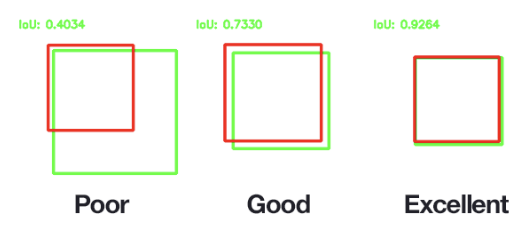

보통 IoU 값이 0.5 이상이면 잘 예측했다고 본다.

이를 코드로 나타내어보면 다음과 같이 구현할 수 있다.
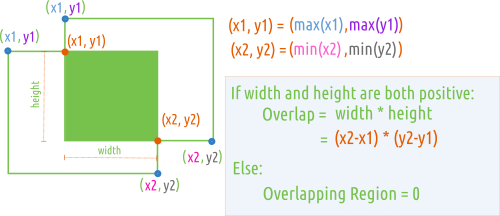
<center> 출처 : https://kuklife.tistory.com/125 </center> 

In [1]:
def get_iou(boxA, boxB, epsilon=1e-5):
    x1 = max(boxA[0], boxB[0])
    y1 = max(boxA[1], boxB[1])
    x2 = min(boxA[2], boxB[2])
    y2 = min(boxA[3], boxB[3])
    width = (x2 - x1)
    height = (y2 - y1)
    if (width<0) or (height <0):
        return 0.0
    area_overlap = width * height
    area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    area_combined = area_a + area_b - area_overlap
    iou = area_overlap / (area_combined+epsilon)
    return iou

#### 3-2) NMS(Non-max suppression)

일반적으로 Input Image가 Object Detection 알고리즘을 통과하면 Object에 bounding box가 그려지면서 어떤 Object일 확률 값을 가지게 된다. 이때, 처음 Object에는 수많은 bounding box가 생기는데, 동일한 Object에 여러 bounding box가 생긴다면 가장 점수가 높은 box만 남기고 나머지를 제거하는 개념이 NMS(Non-max suppression)이다.

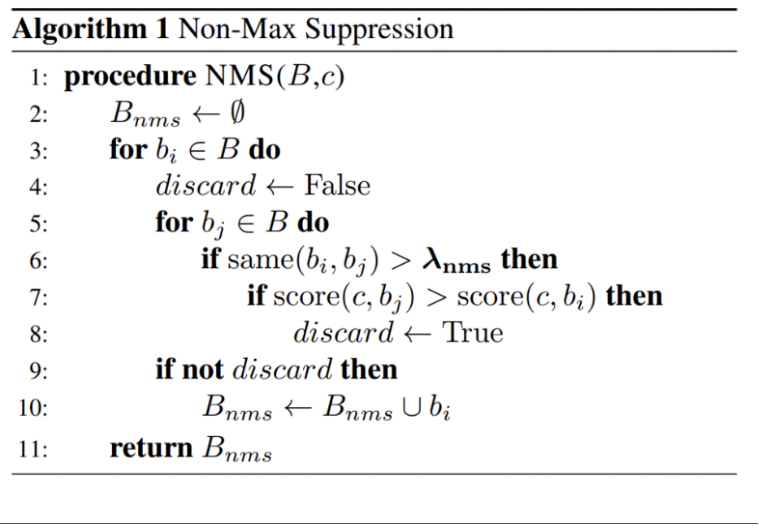
<center> 출처 : https://naknaklee.github.io/etc/2021/03/08/NMS/ </center> 

1. Detected된 bounding box별로 Confidence threshold 이하의 bounding box 제거
2. 가장 높은 Confidence score를 가진 box 순으로 내림차순 정렬을 하고 모든 box에 순차적으로 적용한다.
3. 남아 있는 box만 선택한다.

In [ ]:
# https://deep-learning-study.tistory.com/403
import torch
from IoU import intersection_over_union

def nms(bboxes, iou_threshold, threshold, box_format='corners'):

    # bboxes가 list인지 확인합니다.
    assert type(bboxes) == list

    # box 점수가 threshold보다 높은 것을 선별합니다.
    # box shape는 [class, score, x1, y1, x2, y2] 입니다.
    bboxes = [box for box in bboxes if box[1] > threshold]
    # 점수 오름차순으로 정렬합니다.
    bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)
    bboxes_after_nmn = []

    # bboxes가 모두 제거될때 까지 반복합니다.
    while bboxes:
        # 0번째 index가 가장 높은 점수를 갖고있는 box입니다. 이것을 선택하고 bboxes에서 제거합니다.
        chosen_box = bboxes.pop(0)

        # box가 선택된 box와의 iou가 임계치보다 낮거나
        # class가 다르다면 bboxes에 남기고, 그 이외는 다 없앱니다.
        bboxes = [box for box in bboxes if box[0] != chosen_box[0] \
               or intersection_over_union(torch.tensor(chosen_box[2:]),
                                          torch.tensor(box[2:]),
                                          box_format=box_format)
                    < iou_threshold]

        # 선택된 박스를 추가합니다.
        bboxes_after_nmn.append(chosen_box)

    return bboxes_after_nmn

#### 3-3) mAP(mean Average Precision)

mAP(mean Average Precision)는 FPS와 마찬가지로 Object Detection의 모형 성능 평가지표 중 하나이다. 
<br>ex) R-CNN 모형의 mAP가 35.1%에서 53.7%로 향상되었다.<br>
Precision은 분류 평가지표 중 하나인데 그러려면 다시 돌아가 confusion matrix에서 출발하여 한 번 살펴보자.
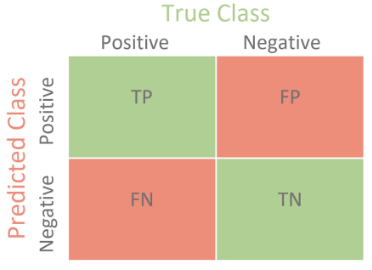
<center> 출처 : https://oniss.tistory.com/36 </center> 

환자의 당뇨를 예측한 모형이 있다고 할 때,
- **True Class** : 실제 정답 값
- **Predicted Class** : 예측 값

- **TP(True Positive)** : 실제 당뇨 환자에게 당뇨라고 예측
- **FN(False Negative)** : 실제 당뇨 환자에게 당뇨가 아니라고 예측
- **FP(False Positive)** : 당뇨 환자가 아닐 때 당뇨라고 예측
- **TN(True Negative)** : 당뇨 환자가 아닐 때 당뇨가 아니라고 예측

명확한 정답값이 있는 분류에서는 confusion matrix를 쉽게 채울 수 있지만 우리는 bounding box를 이용해야 하기 때문에 이 값들을 쉽게 정의하자면 다음과 같은 사진에서 이야기 할 수 있다.
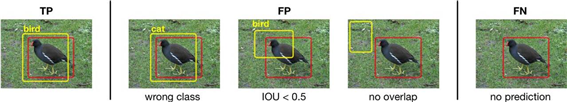
 <center> 출처 : https://techblog-history-younghunjo1.tistory.com/178 </center> 

이렇게 하여 4가지로 분류하여 값을 채워둘 수 있고, 이 confusion matrix에서 다양한 평가지표들이 나오게 된다.

- **Recall(재현율)** : 실제 정답 값 True 중 True라고 예측한 비율이다.
- **Precision(정밀도)** : True라고 예측한 값 중에서 실제 True인 비율이다.

평가지표중 Recall과 Precision은 trade-off 관계이다. 그래서 보통 두 가지의 성능지표들을 함께 사용하는 경우가 많은데, 여기서, AP를 사용한다.
AP(Average Precision)은 PR curve(Precision Recall curve)에서의 면적을 의미한다.

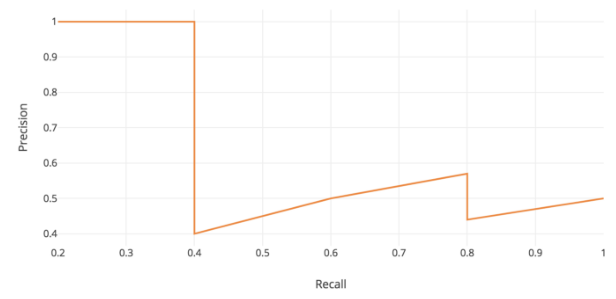
<center> 출처 : https://oniss.tistory.com/36 </center>

보통 그래프를 다음과 같이 바꾼 후 AP를 계산한다고 한다.
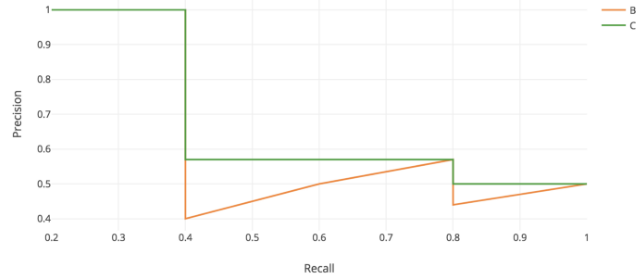
<center> 출처 : https://oniss.tistory.com/36 </center>

그렇다면, **mAP(mean Average Precision)는 뭘까?!**<br>
mAP(mean Average Precision)는 AP의 평균, 즉 Object Class가 여러 개인 경우 Class당 AP를 모두 합친 값을 Class 개수로 나눈 평균 값을 의미한다.

In [ ]:
# https://visionhong.tistory.com/12
import torch
from collections import Counter

def mean_average_precision(pred_boxes, true_boxes, iou_threshold=0.5, box_format='corners', num_classes=20):
    # pred_boxes (list):  [[train_idx(image_num), class_pred, prob_score, x1, y1, x2, y2], ...]
    average_precisions = [] # 각 클래스별로 AP가 추가될 리스트
    epsilon = 1e-6 # stability numeric
    for c in range(num_classes):
        detections = [] # 각 클래스의 detection이 담길 리스트
        ground_truths = [] # 각 클래스의 ground truth가 담길 리스트
        
        for detection in pred_boxes:
            if detection[1] == c:
                detections.append(detection)
                
        for true_box in true_boxes: 
            if true_box[1] == c:
                ground_truths.append(true_box)
                
        # img 0 has 3 bboxes
        # img 1 has 5 bboxes
        # amount_bboxes = {0:3, 1:5}
        amount_bboxes = Counter(gt[0] for gt in ground_truths) # gt의 각 이미지(key)의 개수(value)를 셈
        
        for key, val in amount_bboxes.items():
            amount_bboxes[key] = torch.zeros(val) # 개수를 1차원 tensor로 변환
        # amount_boxes = {0: torch.tensor([0,0,0]), 1:torch.tensor([0,0,0,0,0])}
        
        detections.sort(key=lambda x: x[2], reverse=True) # detections의 confidence가 높은 순으로 정렬
        TP = torch.zeros((len(detections))) # detections 개수만큼 1차원 TP tensor를 초기화
        FP = torch.zeros((len(detections))) # 마찬가지로 1차원 FP tensor 초기화
        total_true_bboxes = len(ground_truths) # recall의 TP+FN으로 사용됨
        
        for detection_idx, detection in enumerate(detections): # 정렬한 detections를 하나씩 뽑음
            # ground_truth_img : detection과 같은 이미지의 ground truth bbox들을 가져옴
            ground_truth_img = [bbox for bbox in ground_truths if bbox[0] == detection[0]]         
            best_iou = 0 # 초기화
            
            for idx, gt in enumerate(ground_truth_img): # 현재 detection box를 이미지의 ground truth들과 비교
                iou = intersection_over_union(
                        torch.Tensor(detection[3:]).view(1,-1),
                        torch.Tensor(gt[3:]).view(1,-1),
                        box_format=box_format)
                
                if iou > best_iou: #ground truth들과의 iou중 가장 높은놈의 iou를 저장
                    best_iou = iou
                    best_gt_idx = idx # 인덱스도 저장
            
            if best_iou > iou_threshold: # 그 iou가 0.5 이상이면 헤당 인덱스에 TP = 1 저장, 이하면 FP = 1 저장 
                if amount_bboxes[detection[0]][best_gt_idx] == 0:
                    TP[detection_idx] = 1
                    amount_bboxes[detection[0]][best_gt_idx] = 1
                else:
                    FP[detection_idx] = 1 # 이미 해당 물체를 detect한 물체가 있다면 즉 인덱스 자리에 이미 TP가 1이라면 FP=1적용
            else:
                FP[detection_idx] = 1
            
        # [1, 1, 0, 1, 0] -> [1, 2, 2, 3, 3]    
        TP_cumsum = torch.cumsum(TP, dim=0)
        FP_cumsum = torch.cumsum(FP, dim=0)
        recalls = TP_cumsum / (total_true_bboxes + epsilon)
        precisions = torch.divide(TP_cumsum, (TP_cumsum + FP_cumsum + epsilon)) # TP_cumsum + FP_cumsum을 하면 1씩 증가하게됨
        
        recalls = torch.cat((torch.tensor([0]), recalls)) # x축의 시작은 0 이므로 맨앞에 0추가
        precisions = torch.cat((torch.tensor([1]), precisions)) # y축의 시작은 1 이므로 맨앞에 1 추가
        # 현재 클래스에 적분 함수로 대해 AP를 계산해줌
        average_precisions.append(torch.trapz(precisions, recalls))
        
    return sum(average_precisions) / len(average_precisions) # MAP